Flux Fusion Glasses

# Initialization (install Packages, load group data, define helpful functions)

## Packages

In [1]:
from qiskit import QuantumCircuit, IBMQ, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor
%qiskit_version_table
%qiskit_copyright
import numpy as np
from time import gmtime, strftime, localtime
import matplotlib.pyplot as plt
%matplotlib inline

## D4 group data

In [2]:
# These permutation matrices compute left multiplication and right multiplication on the group elements as column vectors

import numpy as np

e = np.identity(8)

R_l = np.array([[0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0]])

R2  = np.array([[0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0]])

R3_l = np.array([[0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0]])

m_l = np.array([[0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0]])

mR_l = np.array([[0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0]])

mR2_l = np.array([[0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,0,0,1],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0]])

mR3_l = np.array([[0,0,0,0,0,0,0,1],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,1,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [1,0,0,0,0,0,0,0]])

R_r = np.array([[0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0]])

R3_r = np.array([[0,1,0,0,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,1,0,0,0]])

m_r = np.array([[0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,1,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,1,0,0,0,0,0,0]])

mR_r = np.array([[0,0,0,0,0,1,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,1,0],
                [0,1,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,1,0,0,0,0,0]])

mR2_r = np.array([[0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,1],
                  [0,0,1,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [1,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0]])

mR3_r = np.array([[0,0,0,0,0,0,0,1],
                  [0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,1,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [1,0,0,0,0,0,0,0]])

inv = np.array([[1,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0],
                [0,0,1,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,1,0],
                [0,0,0,0,0,0,0,1]])

# This function transforms group elements from string format (as written at start of file) to column vector format used in the code. 
# This makes some later functions more readable.

def vector(element):
    if element in ['e']:
        return np.array([1,0,0,0,0,0,0,0])
    elif element in ['R']:
        return np.array([0,1,0,0,0,0,0,0])
    elif element in ['R2']:
        return np.array([0,0,1,0,0,0,0,0])
    elif element in ['R3']:
        return np.array([0,0,0,1,0,0,0,0])
    elif element in ['m']:
        return np.array([0,0,0,0,1,0,0,0])
    elif element in ['mR']:
        return np.array([0,0,0,0,0,1,0,0])
    elif element in ['mR2']:
        return np.array([0,0,0,0,0,0,1,0])
    elif element in ['mR3']:
        return np.array([0,0,0,0,0,0,0,1])

def conjugacy_class(element):
    if element in ['e']:
        return [vector('e')]
    elif element in ['R2']:
        return [vector('R2')]
    elif element in ['R','R3']:
        return [vector('R'),vector('R3')]
    elif element in ['m','mR2']:
       return [vector('m'),vector('mR2')]
    elif element in ['mR','mR3']:
        return [vector('mR'),vector('mR3')]

# Gets the correct matrices for left and right multiplication

def left_mult(element):
    if np.array_equal(element,np.array([1,0,0,0,0,0,0,0])) == True:
        return e
    elif np.array_equal(element,np.array([0,1,0,0,0,0,0,0])) == True:
        return R_l
    elif np.array_equal(element,np.array([0,0,1,0,0,0,0,0])) == True:
        return R2
    elif np.array_equal(element,np.array([0,0,0,1,0,0,0,0])) == True:
        return R3_l
    elif np.array_equal(element,np.array([0,0,0,0,1,0,0,0])) == True:
        return m_l
    elif np.array_equal(element,np.array([0,0,0,0,0,1,0,0])) == True:
        return mR_l
    elif np.array_equal(element,np.array([0,0,0,0,0,0,1,0])) == True:
        return mR2_l
    elif np.array_equal(element,np.array([0,0,0,0,0,0,0,1])) == True:
        return mR3_l

def right_mult(element):
    if np.array_equal(element,np.array([1,0,0,0,0,0,0,0])) == True:
        return e
    elif np.array_equal(element,np.array([0,1,0,0,0,0,0,0])) == True:
        return R_r
    elif np.array_equal(element,np.array([0,0,1,0,0,0,0,0])) == True:
        return R2
    elif np.array_equal(element,np.array([0,0,0,1,0,0,0,0])) == True:
        return R3_r
    elif np.array_equal(element,np.array([0,0,0,0,1,0,0,0])) == True:
        return m_r
    elif np.array_equal(element,np.array([0,0,0,0,0,1,0,0])) == True:
        return mR_r
    elif np.array_equal(element,np.array([0,0,0,0,0,0,1,0])) == True:
        return mR2_r
    elif np.array_equal(element,np.array([0,0,0,0,0,0,0,1])) == True:
        return mR3_r



## Functions

In [3]:
def swapPositions(list, pos1, pos2):
     
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

def flip(x):
    if x==0: return 1 
    else: return 0

def flipall(x):
    return [flip(k) for k in x]


def convert(result):
    array=[list(map(lambda x: int(x),list(k))) for k in result.keys() for x in range(0,result[k])]
    for m in array:
        m.reverse()
    array = [k[0:measuredbits] for k in array]    
    return array   
    

## Define map from old to new

In [4]:
# Mapping the old layout to the qubits of the IBM machine

g0=0
g1=1
g2=2
g3=3
g4=4
g5=5
g6=6
g7=7
g8=8
g9=9
g10=10
g11=11
g12=12
g13=13
g14=14
g15=15
g16=16
g17=17
g18=18
g19=19
g20=20
g21=21
g22=22
g23=23
g24=24
g25=25
g26=26

G=[g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26]

# Set Measurement Type

In [5]:
# Set the measurement you want to either 'charge' or 'flux' or 'both'.
measurement_type = 'both'

# Set the initial state to 'identity', 'ground state' or 'random'

initial_state = 'ground state'

# Set whether or not a ribbon is applied (True/False)

ribbon = True


# Number of repetitions 

# repetitions = 10

# Define Circuit

## Prepare initial state

In [6]:
# Initialize Qubits
circ = QuantumCircuit(20, 20)


if initial_state == 'ground state':
# Prepare groundstate

    circ.h(g0)
    circ.h(g1)
    circ.h(g2)
    circ.h(g9)
    circ.h(g10)
    circ.h(g11)


    circ.cx(g0,g3)
    circ.cx(g1,g4)
    circ.cx(g2,g5)
    circ.cx(g9,g6)
    circ.cx(g10,g7)
    circ.cx(g11,g8)
    
if initial_state == 'random':

    omegas = [np.random.rand() * np.pi * 2 for i in range(20)]
    phis = [np.random.rand() * np.pi * 2 for i in range(20)]
    thetas = [np.arccos(2 * np.random.rand() - 1) for i in range(20)]    
    
    for i in range(27):
        circ.rz(omegas[i],i)
    for i in range(27):
        circ.rx(phis[i],i)
    for i in range(27):
        circ.rz(thetas[i],i)

## Ribbon operators
Then the ribbon operators. They both use two ancillas in a Bell state, with one of the ancillas moved around the circuit and interacting with the edges. Multiplication circuits for the conjugacy class  {𝑅,𝑅3}  are given here.

In [7]:
if ribbon:
  ## Ribbon 1 up to the 'crossover swap'
    print('test')
    circ.h(g16)                        # create Bell pair
    circ.cx(g16,g17)
    #circ.swap(g0,g1)                   # Swap qubits representing R2 and m on edge 1
    circ.cx(g0,g17)                    # Conjugate ancilla
    circ.cx(g2,g0)                     # Start the multiplication onto the edge
    circ.cx(g1,g0)                     # Swap back and CNOT m onto R2, 4 CNOTs simplify to 2
    circ.cx(g0,g1)
    circ.cx(g17,g0)                    # CNOT from ancilla and complete the multiplication onto edge 1
    circ.x(g2)

    #circ.swap(g17,g20)                 # Move ancilla to edge 4, swap R2 and R on edge 4
    #circ.swap(g17,g21)
    #circ.swap(g7,g8)

    circ.cx(g17,g7)                    # CNOT from ancilla onto edge 4
    circ.cx(g7,g8)                     # SWAP + CNOT maneuvre again
    circ.cx(g8,g7)
    circ.x(g8)                         # The two X gates complete the postmultiplication of edge 4 by the ancilla inverse
    circ.x(g7)
    
    
## Ribbon 2 up to the 'crossover swap'
    circ.h(g18)                         # create Bell pair
    circ.cx(g18,g19)                      
    #circ.swap(g9,g6)                    # SWAPs for conjugation by edge 6
    circ.cx(g9,g19)                     # conjugation
    #circ.swap(g9,g6)

    
     # The crossover circ.swap

    #circ.swap(g17,g19)                     # circ.swaps the position of the two ribbon ancillas

      # Completing ribbon 1
    circ.cx(g6,g17)                      # circ.cx from edge four, the m qubit, onto the ancilla for conjugation


      # Completing ribbon 2
    #circ.swap(g19,g22)
    circ.cx(g7,g8)
    circ.cx(g19,g8)
    circ.x(g7)

                     

      # Moving both ancilla pairs back together, undoing bell pair state and measure

    #circ.swap(g16,g20)
    #circ.swap(g22,g19)
    #circ.swap(g16,g21)
   # circ.swap(g19,g17)
    circ.cx(g16,g17)
    circ.cx(g18,g19)
    circ.h(g16)
    circ.h(g18)


test


## Measurements

In [8]:
# # Charge measurement setup for edges 3 and 4

if measurement_type == 'flux':
   if ribbon:
      measuredbits=16  
      circ.measure(G[0:12]+G[16:20],range(measuredbits))
        
   else:
      measuredbits=12
      cirq.measure(G[0:12],range(measuredbits))
            


if measurement_type == 'charge':
    circ.h(g12)	     # Set up superposition of subgroup {e,m,R2,mR2}. Qubit 12 encodes m, qubit 14 encodes R2.
    circ.h(g14)       

    circ.cx(g12,g13)         # Multiply onto neighbouring ancillas
    circ.cx(g14,g15)

    circ.cx(g12,g6)          # Multiply into the edges 3 and 4 that make up a plaquette, acting on the m and R2 qubits.
    circ.cx(g13,g9)
    circ.cx(g14,g8)
    circ.cx(g15,g10)

    circ.cx(g12,g13)         # Undo multiplication onto the additional ancillas
    circ.cx(g14,g15)

    circ.h(g12)              # Hadamard back
    circ.h(g14)
    
        
  
  # measure the two qubits encoding the subgroup
    if ribbon:
        measuredbits=6
        circ.measure([g12,g14]+G[16:20],range(measuredbits))
    else:
        measuredbits=2
        circ.measure([g12,g14],range(measuredbits))
        
        
if measurement_type == 'both':
    print('both')
    circ.h(g12)
    circ.h(g14)        # Set up superposition of subgroup {e,m,R2,mR2}. Qubit 12 encodes m, qubit 14 encodes R2.

    circ.cx(g12,g13)         # Multiply onto neighbouring ancillas
    circ.cx(g14,g15)

    circ.cx(g12,g6)          # Multiply into the edges 3 and 4 that make up a plaquette, acting on the m and R2 qubits.
    circ.cx(g13,g9)
    circ.cx(g14,g8)
    circ.cx(g15,g10)

    circ.cx(g12,g13)         # Undo multiplication onto the additional ancillas
    circ.cx(g14,g15)

    circ.h(g12)  ##strategy=InsertStrategy.NEW_THEN_INLINE)        # Hadamard back
    circ.h(g14)
   
    if ribbon:
        measuredbits=12             
        circ.measure(G[6:12] + [g12,g14]+G[16:20],range(measuredbits)) 
    else:
        measuredbits=8             
        circ.measure(G[6:12] + [g12,g14],range(measuredbits))
    
              

both


# Process Results

In [9]:
def processmeasurement(outcomes):
    # Results in array form: if there is a ribbon, pick out only the correct ones.


    if ribbon:
      measurements_filtered = []
      for mmt in outcomes:
        if np.array_equal(mmt[-4:],[0,0,0,0]):
          measurements_filtered.append(mmt[:-4])
      outcomes = measurements_filtered

    repetitions_filtered = len(outcomes)
   

    
    if measurement_type == 'flux':
      centre = 0

      for mmt in outcomes:
        edge1 = np.kron(np.eye(2)[:,mmt[0]],
                      np.kron(np.eye(2)[:,mmt[1]],
                              np.eye(2)[:,mmt[2]]
                              ))
        edge2 = np.kron(np.eye(2)[:,mmt[3]],
                      np.kron(np.eye(2)[:,mmt[4]],
                              np.eye(2)[:,mmt[5]]
                              ))
        edge3 = np.kron(np.eye(2)[:,mmt[6]],
                      np.kron(np.eye(2)[:,mmt[7]],
                              np.eye(2)[:,mmt[8]]
                              ))
        edge4 = np.kron(np.eye(2)[:,mmt[9]],
                      np.kron(np.eye(2)[:,mmt[10]],
                              np.eye(2)[:,mmt[11]]
                              ))

        centre_flux = left_mult(edge2) @ left_mult(inv @ edge1) @ left_mult(inv @ edge3) @ edge4

        if np.array_equal(centre_flux,vector('e')):
          centre += 1
        return centre
    
    if measurement_type == 'charge':
      count00 = 0
      count01 = 0
      count10 = 0
      count11 = 0

      for mmt in outcomes:
        if np.array_equal(mmt[0:2],[0,0]):
          count00 += 1
        if np.array_equal(mmt[0:2],[0,1]):
          count01 += 1
        if np.array_equal(mmt[0:2],[1,0]):
          count10 += 1
        if np.array_equal(mmt[0:2],[1,1]):
          count11 += 1

      return([count00,count01,count10,count11])
    
    if measurement_type == 'both':
    
      output = np.zeros((4,8))
      for mnt in outcomes:
          if np.array_equal(mnt[-2:],[0,0]):
            index1 = 0
          if np.array_equal(mnt[-2:],[0,1]):
            index1 = 1
          if np.array_equal(mnt[-2:],[1,0]):
            index1 = 2
          if np.array_equal(mnt[-2:],[1,1]):
            index1 = 3

          edge3 = np.kron(np.eye(2)[:,mnt[0]],
                        np.kron(np.eye(2)[:,mnt[1]],
                                np.eye(2)[:,mnt[2]]
                                ))
          edge4 = np.kron(np.eye(2)[:,mnt[3]],
                        np.kron(np.eye(2)[:,mnt[4]],
                                np.eye(2)[:,mnt[5]]
                                ))
          flux = left_mult(edge3) @ inv @ edge4

          for i in range(8):
            g = np.zeros(8)
            g[i] = 1
            if np.array_equal(flux,g):
              index2 = i

          output[index1][index2] += 1
      return output    
    

# Ideal Simulation

In [10]:
# Define simulator for ideal simulation
sim_ideal = AerSimulator()

# Execute and get counts
results = sim_ideal.run(transpile(circ, sim_ideal),shots=5000).result()
counts = results.get_counts(0)



measurements=convert(counts)
# conversion that is tailored to having removed swaps
measurements = [swapPositions(k,1,2) for k in measurements]


print(processmeasurement(measurements))



[[80.  0. 80.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [75.  0. 68.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


# Noisy Simulation

## Description

Running a noise simulation

By storing the device properties in `simulator`, we ensure that the appropriate basis gates and coupling map are used when compiling circuits for simulation, thereby most closely mimicking the gates that will be executed on a real device. In addition `simulator` contains an approximate noise model consisting of:

* **Single-qubit gate errors** consisting of a single qubit depolarizing error followed by a single qubit thermal relaxation error.
* **Two-qubit gate errors** consisting of a two-qubit depolarizing error followed by single-qubit thermal relaxation errors on both qubits in the gate.
* **Single-qubit readout errors** on the classical bit value obtained from measurements on individual qubits.

For the gate errors the error parameter of the thermal relaxation errors is derived using the `thermal_relaxation_error` function from `aer.noise.errors` module, along with the individual qubit $T_1$ and $T_2$ parameters, and the `gate_time` parameter from the device backend properties. The probability of the depolarizing error is then set so that the combined average gate infidelity from the depolarizing error followed by the thermal relaxation is equal to the `gate_error` value from the backend properties.

For the readout errors the probability that the recorded classical bit value will be flipped from the true outcome after a measurement is given by the qubit `readout_errors`.

We call `from_backend` to create a simulator for `ibmq_mumbai`:

Once we have created a noisy simulator backend based on a real device we can use it to run noisy simulations.

**Important:** When running noisy simulations it is *critical* to `transpile` the circuit for the backend so that the circuit is transpiled to the correct noisy basis gate set for the backend.

## Transpile

63
58
57
53
50


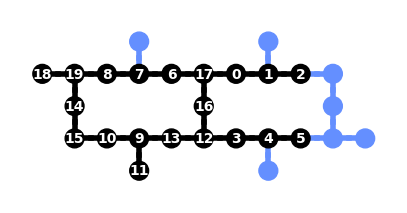

In [29]:
from qiskit.providers.fake_provider import FakeMumbai

# Get a fake backend from the fake provider
backend = FakeMumbai()

sim = AerSimulator.from_backend(backend)

local_layout=[15,18,21, 16,19,22, 10,7,4, 8,5,9, 14,11, 2,3, 13,12, 0,1]


# We want to get a short circuit, let the transpiler try to minimize and accept only circuits with a depth below min
min = 100

# Transpile the circuit for the noisy basis gates
for i in range(1000):
    ttest = transpile(circ, sim, initial_layout=local_layout,optimization_level=3)
    testmin=ttest.depth()
    if testmin< min:
        min=testmin
        tcirc=ttest
        print(min)   
        
        
        
plot_circuit_layout(tcirc,backend)        

## Run

In [ ]:
# Execute noisy simulation and get counts
print(strftime("%Y-%m-%d %H:%M:%S", localtime()))
result_noise = sim.run(tcirc,shots=3000).result()
print(strftime("%Y-%m-%d %H:%M:%S", localtime()))



In [33]:

counts_noise = result_noise.get_counts(0)
measurements=convert(counts_noise)
measurements = [swapPositions(k,1,2) for k in measurements]
print(processmeasurement(measurements))

[[1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


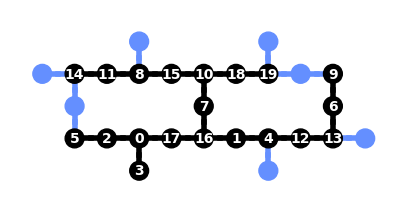

In [20]:
plot_circuit_layout(tcirc,backend)